In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("C:/Users/Admin/ML numpy/dataset.txt")

In [3]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [5]:
dataset.shape

(2035, 8)

In [6]:
dataset.drop('Turnover (Lacs)',axis =1,inplace = True)

In [7]:
dataset.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509


In [8]:
dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
dtype: int64

In [9]:
dataset.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
dtype: bool

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 111.4 KB


In [11]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07


In [12]:
print(len(dataset))

2035


<AxesSubplot:>

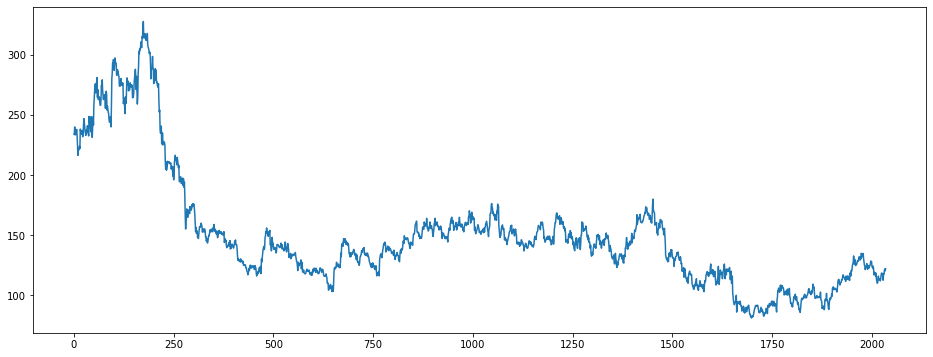

In [13]:
dataset['Open'].plot(figsize=(16,6))

In [14]:
X  = dataset[['Open','High','Low','Last']]
y = dataset['Close']

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [16]:
X_train.shape

(1526, 4)

In [17]:
X_test.shape

(509, 4)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [19]:
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print(regressor.coef_)

[-0.07022177  0.09531797  0.11111128  0.86356926]


In [21]:
print(regressor.intercept_)

0.02876459204591697


In [22]:
predicted=regressor.predict(X_test)

In [23]:
print(X_test)

        Open    High     Low    Last
704   134.60  136.25  134.15  136.00
1200  146.25  147.80  144.75  145.80
1166  157.10  159.30  156.00  157.20
1245  150.10  153.00  150.10  152.00
1559  110.50  113.15  109.60  112.20
...      ...     ...     ...     ...
31    237.30  237.95  231.10  233.65
923   147.20  149.20  146.00  148.55
2027  116.50  118.00  114.60  115.85
1627  120.05  120.05  115.00  115.80
1694   83.95   85.20   81.30   83.80

[509 rows x 4 columns]


In [24]:
predicted.shape

(509,)

In [25]:
dframe=pd.DataFrame(y_test,predicted)

In [26]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [27]:
print(dfr)

      Actual   Predicted
704   134.95  135.914986
1200  145.35  145.838583
1166  157.10  157.267525
1245  152.15  152.012458
1559  112.05  112.124755
...      ...         ...
31    233.55  233.496825
923   148.45  148.419022
2027  116.05  115.873301
1627  116.00  115.820682
1694   83.95   83.655190

[509 rows x 2 columns]


In [28]:
dfr.head(25)

,Actual,Predicted
704,134.95,135.914986
1200,145.35,145.838583
1166,157.10,157.267525
1245,152.15,152.012458
1559,112.05,112.124755
1467,156.95,157.544638
1154,144.25,144.528265
906,163.60,163.608537
1550,109.45,109.387972
536,141.00,140.918260


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
regressor.score(X_test,y_test)

0.9999321508551163

In [31]:
import math

In [32]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.2852177985586222


In [33]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 0.15881905664894408


In [34]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 0.3985210868309782


In [35]:
graph=dfr.head(20)

<AxesSubplot:>

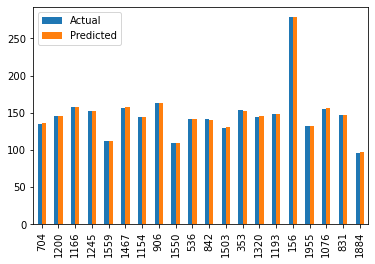

In [36]:
graph.plot(kind='bar')